In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import load_img
from keras.models import load_model

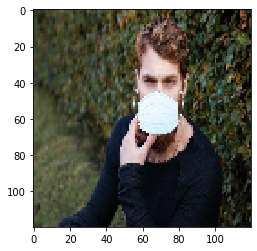

In [51]:
#Sample image
image = load_img("./dataset/with_mask/0-with-mask.jpg", target_size = (120, 120))
plt.imshow(image)
plt.show()

In [52]:
x_train = np.ndarray((1394, 150, 150, 3), dtype = "float32")
y = []
c = 0

In [53]:
#Loading the images and corresponding labels
path  = path = pathlib.Path("./dataset/with_mask")
for i in path.iterdir():
    image = load_img(str(i), target_size = (150, 150))
    image = np.asarray(image)
    x_train[c] = image
    c = c + 1
    y.append(1)

In [54]:
#Loading the images and corresponding labels
path  = path = pathlib.Path("./dataset/without_mask")
for i in path.iterdir():
    image = load_img(str(i), target_size = (150, 150)) 
    image = np.asarray(image)
    x_train[c] = image
    c = c + 1
    y.append(0)

In [55]:
y = np.asarray(y)
x_train.shape, y.shape

((1394, 150, 150, 3), (1394,))

In [56]:
#Shuffling the data for better performance
X , y = shuffle(x_train, y, random_state = 0)

In [57]:
#Normalising
X = X / 255.0

In [58]:
X[0].shape

(150, 150, 3)

(<matplotlib.image.AxesImage at 0x7fe595458fd0>, 1)

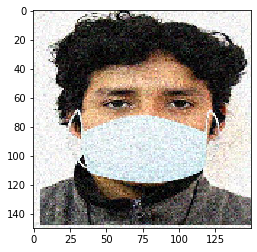

In [59]:
#Sample data
plt.imshow(X[1].squeeze(), cmap = "gray"), y[1]

In [60]:
y = np.array(y)
X.shape, y.shape

((1394, 150, 150, 3), (1394,))

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [62]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1254, 150, 150, 3), (1254,), (140, 150, 150, 3), (140,))

In [63]:
#Converting the labels into a categorical form i.e for "MASK" : 1 and "NO MASK" : 0
import keras
number_cat = 2
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [64]:
y_train.shape, y_test.shape

((1254, 2), (140, 2))

In [65]:
#Sample data and labels

(<matplotlib.image.AxesImage at 0x7fe59551d828>,
 array([1., 0.], dtype=float32))

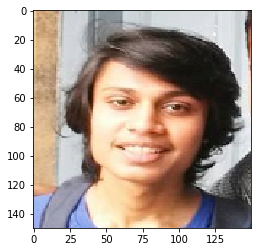

In [66]:
plt.imshow(X_train[0].squeeze(), cmap = "gray"), y_train[0]

In [67]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard

In [68]:

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.33))

model.add(Dense(units = 2, activation = "softmax"))

In [69]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 70, 70, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 33, 33, 128)       73856     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 31, 31, 128)      

In [70]:
model.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ["accuracy"])

In [71]:
#Training the model
history = model.fit(X_train, y_train, epochs = 15, batch_size = 32 , validation_data = (X_test, y_test), verbose = 1)

Train on 1254 samples, validate on 140 samples
Epoch 1/15
1254/1254 [==============================] - 45s 36ms/step - loss: 0.8698 - accuracy: 0.5128 - val_loss: 0.6928 - val_accuracy: 0.5500
Epoch 2/15
1254/1254 [==============================] - 44s 35ms/step - loss: 0.7571 - accuracy: 0.6061 - val_loss: 0.5313 - val_accuracy: 0.7286
Epoch 3/15
1254/1254 [==============================] - 44s 35ms/step - loss: 0.3764 - accuracy: 0.8652 - val_loss: 0.1425 - val_accuracy: 0.9429
Epoch 4/15
1254/1254 [==============================] - 46s 37ms/step - loss: 0.2451 - accuracy: 0.9298 - val_loss: 0.2695 - val_accuracy: 0.8929
Epoch 5/15
1254/1254 [==============================] - 46s 37ms/step - loss: 0.1589 - accuracy: 0.9450 - val_loss: 0.0750 - val_accuracy: 0.9714
Epoch 6/15
1254/1254 [==============================] - 43s 34ms/step - loss: 0.1861 - accuracy: 0.9474 - val_loss: 0.0954 - val_accuracy: 0.9714
Epoch 7/15
1254/1254 [==============================] - 42s 34ms/step - loss:

In [72]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

<function matplotlib.pyplot.show(*args, **kw)>

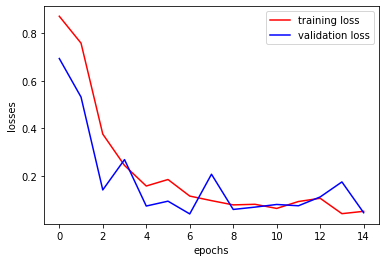

In [73]:
plt.plot(history.history['loss'], "r", label = "training loss")
plt.plot(history.history['val_loss'], "b", label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("losses")
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

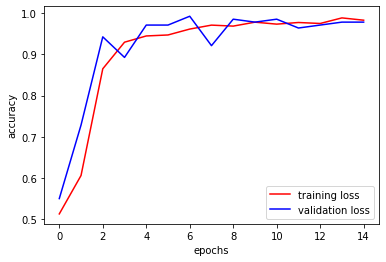

In [74]:
plt.plot(history.history['accuracy'], "r", label = "training loss")
plt.plot(history.history['val_accuracy'], "b", label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show

In [75]:
model.save("Model1.h5")

In [76]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [77]:
number_cat = 2
y_train1 = keras.utils.to_categorical(y_train1, number_cat)
y_test1 = keras.utils.to_categorical(y_test1, number_cat)

In [78]:
model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model1.add(MaxPooling2D(pool_size = (2, 2)))

model1.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"))
model1.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"))
model1.add(MaxPooling2D(pool_size = (2, 2)))

model1.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"))
model1.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"))
model1.add(MaxPooling2D(pool_size = (2, 2)))

model1.add(Flatten())

model1.add(Dense(units = 256, activation = "relu"))
model1.add(Dropout(0.5))

model1.add(Dense(units = 128, activation = "relu"))
model1.add(Dropout(0.33))

model1.add(Dense(units = 2, activation = "softmax"))

In [79]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 70, 70, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 33, 33, 128)       73856     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 31, 31, 128)      

In [80]:
model1.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ["accuracy"])

In [81]:
#Training the model
history1 = model1.fit(X_train1, y_train1, epochs = 15, batch_size = 32 , validation_data = (X_test1, y_test1), verbose = 1)

Train on 1254 samples, validate on 140 samples
Epoch 1/15
1254/1254 [==============================] - 40s 32ms/step - loss: 0.8706 - accuracy: 0.5710 - val_loss: 0.5809 - val_accuracy: 0.6500
Epoch 2/15
1254/1254 [==============================] - 43s 34ms/step - loss: 0.4246 - accuracy: 0.8836 - val_loss: 0.6646 - val_accuracy: 0.8000
Epoch 3/15
1254/1254 [==============================] - 42s 34ms/step - loss: 0.3038 - accuracy: 0.9083 - val_loss: 0.3363 - val_accuracy: 0.8786
Epoch 4/15
1254/1254 [==============================] - 42s 34ms/step - loss: 0.1689 - accuracy: 0.9498 - val_loss: 0.1803 - val_accuracy: 0.9571
Epoch 5/15
1254/1254 [==============================] - 43s 34ms/step - loss: 0.1609 - accuracy: 0.9522 - val_loss: 1.7966 - val_accuracy: 0.5357
Epoch 6/15
1254/1254 [==============================] - 42s 34ms/step - loss: 0.1297 - accuracy: 0.9617 - val_loss: 0.1650 - val_accuracy: 0.9571
Epoch 7/15
1254/1254 [==============================] - 42s 34ms/step - loss:

In [83]:
history1.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

<function matplotlib.pyplot.show(*args, **kw)>

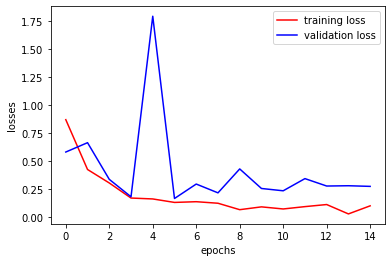

In [84]:
plt.plot(history1.history['loss'], "r", label = "training loss")
plt.plot(history1.history['val_loss'], "b", label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("losses")
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

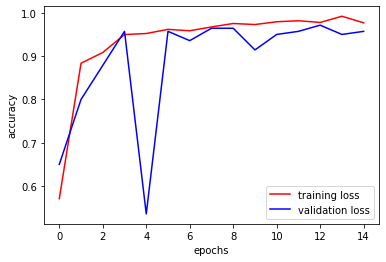

In [85]:
plt.plot(history1.history['accuracy'], "r", label = "training loss")
plt.plot(history1.history['val_accuracy'], "b", label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show

In [86]:
model1.save("Model2.h5")